#  Homework 3 (HW3)

Deadline: April 3rd Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW3/1)

In this exercise we  predict the quality of different wines! Can a winemaker predict whether his wine will be considered a good quality wine by the jury based on it's chemical properties only? 🍷 (50%)

**a)** We will work using the data available at the [UCI dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). It  contains data on 11 chemical properties (e.g. sugar content, pH, alcohol content, etc.) of thousands of north-Portugalian wines. Each wine has a quality-score on a scale of 10. 

* Import the **Red** wine data into a pandas dataframe from the [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (You can import the data directly from the web page, without dowloading it to your computer!) The *quality* column will be the target variable, the rest will be the features. 
* This will be a binary classification problem, hence, redefine the target variable in the following way: let it be 0 if the *quality < 7* (bad wines) and let it be 1 if *quality $\geq$ 7* (good wines). Create separate *numpy arrays* to store the target and the rest of the attributes!  


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn import metrics 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split, cross_val_score 



In [18]:
redwine = pd.read_csv('/Users/nixilis/Desktop/DS_BP/DSHW3/winequality-red.csv', sep=";")  
redwine.head(5)

print(redwine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [19]:
qual = redwine[['quality']]
qualdf = pd.DataFrame(qual)

qualdf["binary"] = int(1) 
qualdf.loc[qualdf["quality"] < 7, "binary"] = 0 

binqual = qualdf["binary"] 
#quala = np.array(binqual)  

redwine = redwine.join(binqual) 
redwine.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


##### **b)** Classification, cross validation
* Perform a classification using the kNN algorithm! Using the 10-fold cross validation technique determine for what *k* value will the classifier's F-score be optimal! (Analyze values of *k* in a reasonable interval!) <br>
Present the boxplot of the obtained F-scores (the boxplot of 10 F-scores for each *k* values) against *k*!  <br>
(Hint: use the *model_selection.cross_val_score* function and set *scoring = 'f1'*!) 
<br>
(Hint2: use the boxplot function from the *seaborn* package!)


In [33]:
labels = redwine['binary'] 
attrs = redwine.drop('quality', axis = 1) 
attrs = attrs.drop('binary', axis = 1) 

attrs_train, attrs_test, labels_train, labels_test = train_test_split(attrs, labels, test_size=0.33, random_state=42)

In [34]:
f1s = dict()  

for i in range(1, 10): 
    neigh = KNeighborsClassifier(n_neighbors=i, metric="euclidean") 
    
    f1s[i] = cross_val_score(neigh, attrs, labels, cv = 10, scoring = 'f1') 
    ##print(f1s[i]) 

/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


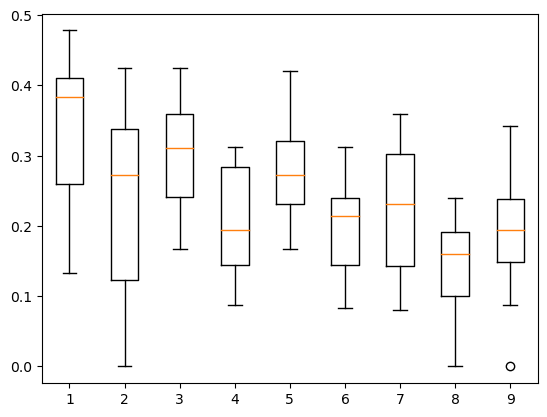

In [35]:
plt.boxplot(x=list(f1s.values()), labels=list(f1s.keys())) 
plt.show()

**c)** Now solve the classification problem using a decision tree! Repeat the analysis of part b), but now, let the examined parameter be the tree's maximum depth!

In [36]:
f1stree = dict()  

for i in range(1, 11): 
    dTree = DecisionTreeClassifier(max_depth = i) 
    f1stree[i] = cross_val_score(dTree, attrs, labels, cv = 10, scoring = 'f1') 
    print(f1stree[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.23076923 0.58064516 0.44444444 0.47058824 0.51612903 0.38888889
 0.45       0.44444444 0.48648649 0.4516129 ]
[0.25       0.54545455 0.3125     0.46666667 0.53333333 0.4
 0.32727273 0.51282051 0.47058824 0.25      ]
[0.38461538 0.33333333 0.5106383  0.54545455 0.75675676 0.54545455
 0.43243243 0.57777778 0.45714286 0.37037037]
[0.32       0.33333333 0.5        0.5        0.57142857 0.44444444
 0.31578947 0.52173913 0.48780488 0.24      ]
[0.32       0.32258065 0.6        0.57142857 0.51612903 0.57777778
 0.30434783 0.56521739 0.36842105 0.22222222]
[0.44444444 0.3125     0.41860465 0.47619048 0.58823529 0.55813953
 0.35555556 0.43478261 0.37837838 0.25806452]
[0.09090909 0.3125     0.43636364 0.47368421 0.63414634 0.45454545
 0.33333333 0.48888889 0.35897436 0.23529412]
[0.25       0.3125     0.41666667 0.44       0.44444444 0.46511628
 0.4137931  0.47826087 0.38888889 0.21621622]
[0.32       0.28571429 0.44897959 0.47826087 0.47058824 0.5
 0.44827586

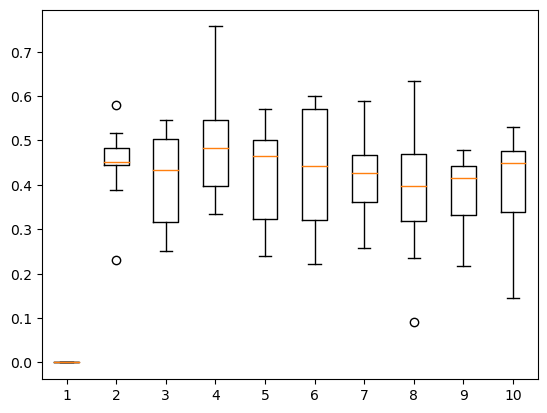

In [37]:
plt.boxplot(x=list(f1stree.values()), labels=list(f1stree.keys()))
plt.show()

## Exercise 2 (HW3/2)

Using predictive analytics methods, we would like to identify first-year college students at risk of dropping out and academic failure. <span style="color:red">Write a one-page long essay covering the following points!</span> (50%) If you would prefer, you can write an essay about a data science research question of your choice.

**a)** Design the analysis, think through the stages of the analysis following CRISP-DM methodology! How can you state the problem as a data science problem? What machine learning approaches could be used here? (See Lecture 02!) 

**b)** Do you think that the requirements of a successful data science projects are met? Go through the 7 requirements that we have covered in class! (See Lecture 02!) 

**c)** What ethical questions are raised in this project? Mention utilizations that you think are useful and ethical and give examples of bad applications as well!
